In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

In [ ]:
trucka = io.imread("./trucka.bmp").astype("float")
truckb = io.imread("./truckb.bmp").astype("float")

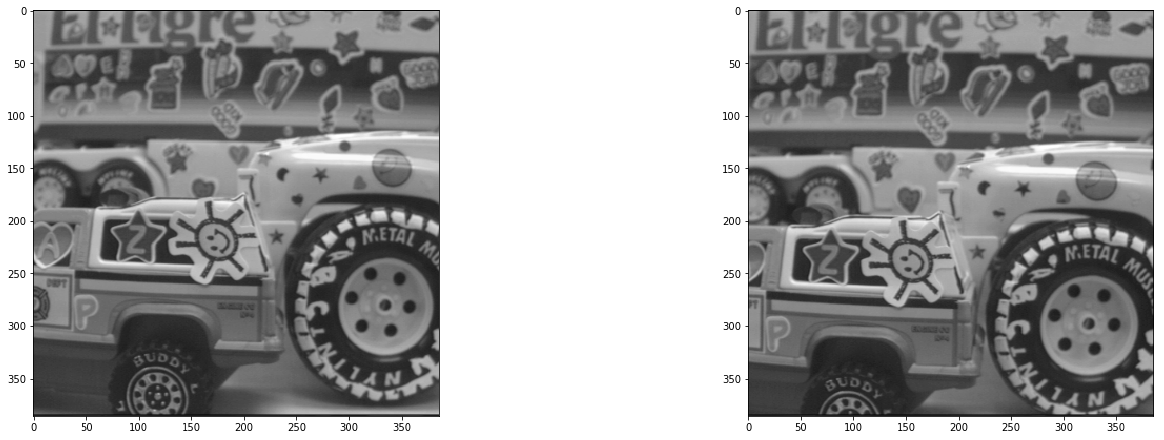

In [3]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.imshow(trucka, cmap="gray")
plt.subplot(2,2,2)
plt.imshow(truckb, cmap="gray")
plt.tight_layout()
plt.show()

In [4]:
def get_block_position(img, windowsize_r=8, windowsize_c=8, stride=8):
    patch_list = []
    position_tup = []
    # Crop out the window 
    for r in range(0,img.shape[0] - windowsize_r, stride):
        for c in range(0,img.shape[1] - windowsize_c, stride):
            position_tup.append((r,c))
            window = img[r:r+windowsize_r,c:c+windowsize_c]
            patch_list.append(window)
    return patch_list, position_tup

def get_motion_and_position(patch_list_a, position_tup_a, patch_list_b, position_tup_b, search_range=50):
    motion_tup = []
    for patch_b, position_b in zip(patch_list_b, position_tup_b):
        cost = 999999
        for patch_a, position_a in zip(patch_list_a, position_tup_a):
            position_distance = ((position_a[0]-position_b[0])**2 + (position_a[1]-position_b[1])**2)**0.5
            if position_distance<=search_range:
                difference = np.sum(abs(patch_a-patch_b))
                if difference <= cost:
                    cost = difference
                    match_position = position_a
        dx, dy = match_position[0]-position_b[0], match_position[1] - position_b[1]
        motion_tup.append((position_b, match_position, (dx, dy)))
    return motion_tup

In [29]:
block = 31
search_range = 50
patch_list_a, position_tup_a = get_block_position(trucka, block, block, stride=1)
patch_list_b, position_tup_b = get_block_position(truckb, block, block, stride=block)

In [30]:
motion_tup = get_motion_and_position(patch_list_a, position_tup_a, patch_list_b, position_tup_b, search_range)

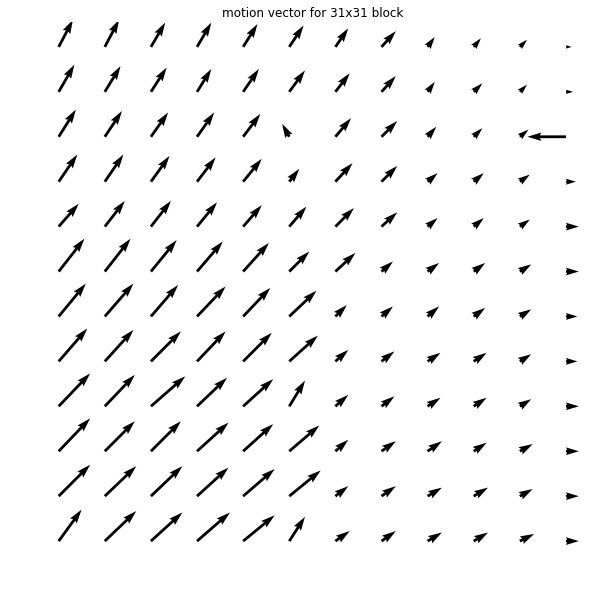

In [31]:
X = [-t[0][0] for t in motion_tup]
Y = [t[0][1] for t in motion_tup]
U = [-t[2][0] for t in motion_tup]
V = [t[2][1] for t in motion_tup]

plt.figure(figsize=(10,10))
plt.quiver(X, Y, V, U,)
plt.title("motion vector for {}x{} block".format(block,block))

# ax=plt.gca()                            # get the axis
# # ax.set_xlim(left=-10, right=370)
# # ax.set_ylim(bottom=370, top=-10)
# # ax.xaxis.tick_top()

# # ax.set_yticklabels([])
# # ax.set_xticklabels([])
plt.axis('off')

plt.savefig("./output/block_{}_motion_vector.png".format(str(block)),  transparent=False)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(truckb, cmap="gray")
plt.show()